In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers.csv")
geolocation = pd.read_csv('olist_geolocation.csv')
order_items = pd.read_csv('olist_order_items.csv')
payments = pd.read_csv('olist_payments.csv')
orders = pd.read_csv('olist_orders.csv')
products = pd.read_csv('olist_products.csv')

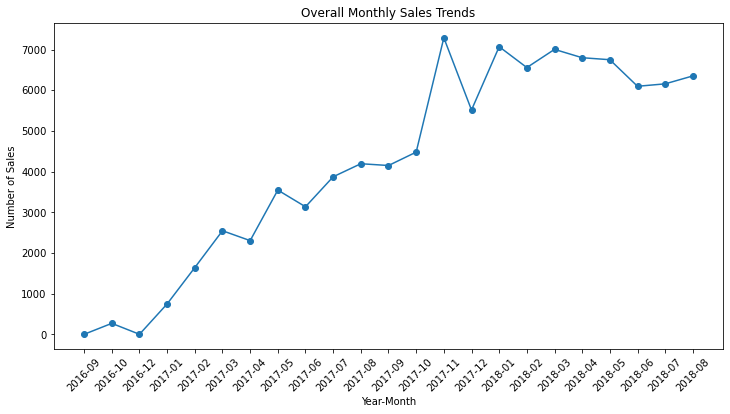

In [2]:
# Convert 'order_purchase_timestamp' to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Extract year and month from the order date
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Group by year and month and extract monthly sales data
monthly_sales = orders.groupby('year_month').size()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.title('Overall Monthly Sales Trends')

# Display the plot
plt.xticks(rotation=45)
plt.show()

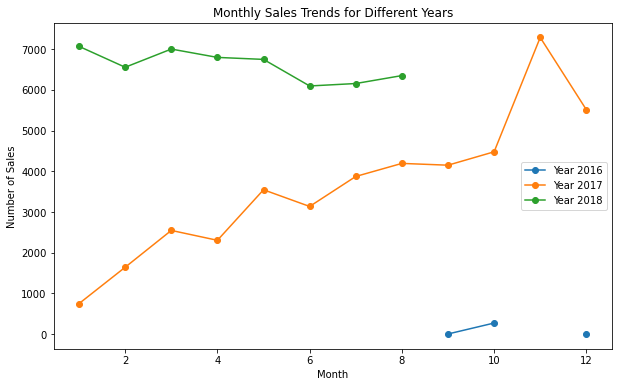

In [3]:
# Extract year from the order date
orders['order_year'] = orders['order_purchase_timestamp'].dt.year

# Extract month from the order date
orders['order_month'] = orders['order_purchase_timestamp'].dt.month

# Group by year and month and extract monthly sales data
monthly_sales_by_year = orders.groupby(['order_year', 'order_month']).size().unstack()

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Plot each year separately
for year in monthly_sales_by_year.index:
    plt.plot(monthly_sales_by_year.columns, monthly_sales_by_year.loc[year], marker='o', linestyle='-', label=f'Year {year}')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Monthly Sales Trends for Different Years')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [4]:
order_product_info = order_items.merge(products, on='product_id')

In [5]:
def classify_cat(x):

    if x in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'
    
    elif x in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'
    
    elif x in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'
    
    elif x in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'
    
    elif x in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'
    
    elif x in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'
    
    elif x in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'
    
    elif x in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'
    
    elif x in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

order_product_info['broad_category'] = order_product_info['product_category_name'].apply(classify_cat)
category = order_product_info.broad_category.value_counts().index
count = order_product_info.broad_category.value_counts().values

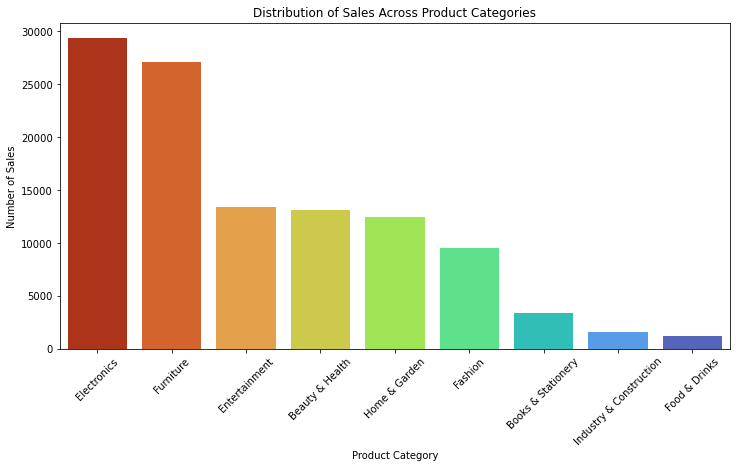

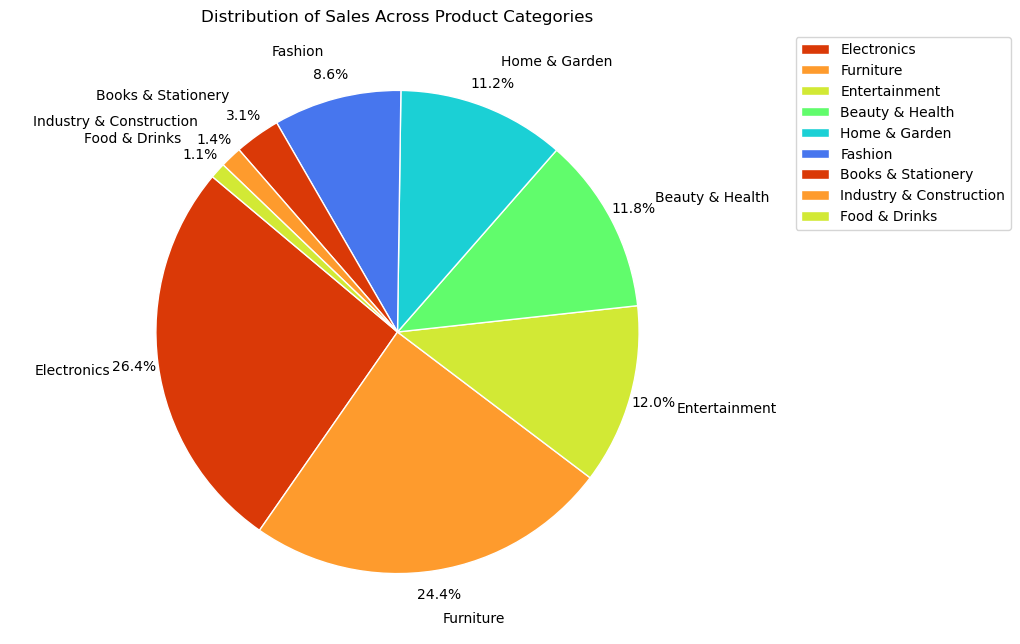

In [6]:
# Plotting Bar Chart
plt.figure(figsize=(12, 6))

# Use the value_counts DataFrame directly
sns.barplot(x=category, y=count, palette='turbo_r')

plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.title('Distribution of Sales Across Product Categories')
plt.xticks(rotation=45)
plt.show()

# Plotting Pie Chart
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
plt.axis('equal')

# Using a colormap for colors
colors = plt.cm.turbo_r(range(len(order_product_info)))

ax.pie(count, labels=category, radius=1, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('turbo_r'), labeldistance=1.20, pctdistance=1.1, wedgeprops=dict(width=1, edgecolor='w'))
plt.title('Distribution of Sales Across Product Categories')
plt.legend(category, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [7]:
print(order_product_info)

                                order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       130898c0987d1801452a8ed92a670612              1   
2       532ed5e14e24ae1f0d735b91524b98b9              1   
3       6f8c31653edb8c83e1a739408b5ff750              1   
4       7d19f4ef4d04461989632411b7e588b9              1   
...                                  ...            ...   
111041  ffebd80e3291e811c308365936897efd              1   
111042  ffee31fb4b5e35c9123608015637c495              1   
111043  fff7c4452f050315db1b3f24d9df5fcd              1   
111044  fffa82886406ccf10c7b4e35c4ff2788              1   
111045  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b

In [8]:
# Group by 'order_id' and get the maximum 'order_item_id'
max_order_item_id = order_product_info.groupby('order_id')['order_item_id'].max().reset_index()

# Now, 'max_order_item_id' contains the maximum 'order_item_id' for each 'order_id'
print(max_order_item_id)

# Merge to get the complete information for the rows with max 'order_item_id'
order_product_info = pd.merge(max_order_item_id, order_product_info, on=['order_id', 'order_item_id'], how='inner')

# Check the result
print(order_product_info)

                               order_id  order_item_id
0      00010242fe8c5a6d1ba2dd792cb16214              1
1      00018f77f2f0320c557190d7a144bdd3              1
2      000229ec398224ef6ca0657da4fc703e              1
3      00024acbcdf0a6daa1e931b038114c75              1
4      00042b26cf59d7ce69dfabb4e55b4fd9              1
...                                 ...            ...
97271  fffc94f6ce00a00581880bf54a75a037              1
97272  fffcd46ef2263f404302a634eb57f7eb              1
97273  fffce4705a9662cd70adb13d4a31832d              1
97274  fffe18544ffabc95dfada21779c9644f              1
97275  fffe41c64501cc87c801fd61db3f6244              1

[97276 rows x 2 columns]
                               order_id  order_item_id  \
0      00010242fe8c5a6d1ba2dd792cb16214              1   
1      00018f77f2f0320c557190d7a144bdd3              1   
2      000229ec398224ef6ca0657da4fc703e              1   
3      00024acbcdf0a6daa1e931b038114c75              1   
4      00042b26cf59d7ce6

In [9]:
print(order_product_info[order_product_info['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef'])

                               order_id  order_item_id  \
49433  8272b63d03f5f79c56e9e4120aec44ef             21   

                             product_id                         seller_id  \
49433  79ce45dbc2ea29b22b5a261bbb7b7ee7  2709af9587499e95e803a6498a5a56e9   

       shipping_limit_date  price  freight_value product_category_name  \
49433  2017-07-21 18:25:23    7.8           6.57         health_beauty   

       product_weight_g  product_length_cm  product_height_cm  \
49433            1000.0               25.0                6.0   

       product_width_cm   broad_category  
49433              12.0  Beauty & Health  


In [10]:
# Merge with purchase timestamp DataFrametimestamps
order_product_info = order_product_info.merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id')
print(order_product_info)

                               order_id  order_item_id  \
0      00010242fe8c5a6d1ba2dd792cb16214              1   
1      00018f77f2f0320c557190d7a144bdd3              1   
2      000229ec398224ef6ca0657da4fc703e              1   
3      00024acbcdf0a6daa1e931b038114c75              1   
4      00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                 ...            ...   
95124  fffc94f6ce00a00581880bf54a75a037              1   
95125  fffcd46ef2263f404302a634eb57f7eb              1   
95126  fffce4705a9662cd70adb13d4a31832d              1   
95127  fffe18544ffabc95dfada21779c9644f              1   
95128  fffe41c64501cc87c801fd61db3f6244              1   

                             product_id                         seller_id  \
0      4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1      e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2      c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23

In [11]:
print(order_product_info[order_product_info['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef'])

                               order_id  order_item_id  \
48347  8272b63d03f5f79c56e9e4120aec44ef             21   

                             product_id                         seller_id  \
48347  79ce45dbc2ea29b22b5a261bbb7b7ee7  2709af9587499e95e803a6498a5a56e9   

       shipping_limit_date  price  freight_value product_category_name  \
48347  2017-07-21 18:25:23    7.8           6.57         health_beauty   

       product_weight_g  product_length_cm  product_height_cm  \
48347            1000.0               25.0                6.0   

       product_width_cm   broad_category order_purchase_timestamp  
48347              12.0  Beauty & Health      2017-07-16 18:19:25  


In [12]:
# Convert 'order_purchase_timestamp' to datetime
order_product_info['order_purchase_timestamp'] = pd.to_datetime(order_product_info['order_purchase_timestamp'])

# Extract year-month from the order date
order_product_info['year_month'] = order_product_info['order_purchase_timestamp'].dt.to_period('M')
print(order_product_info)
print(order_product_info[order_product_info['order_id'] == '8272b63d03f5f79c56e9e4120aec44ef'])

                               order_id  order_item_id  \
0      00010242fe8c5a6d1ba2dd792cb16214              1   
1      00018f77f2f0320c557190d7a144bdd3              1   
2      000229ec398224ef6ca0657da4fc703e              1   
3      00024acbcdf0a6daa1e931b038114c75              1   
4      00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                 ...            ...   
95124  fffc94f6ce00a00581880bf54a75a037              1   
95125  fffcd46ef2263f404302a634eb57f7eb              1   
95126  fffce4705a9662cd70adb13d4a31832d              1   
95127  fffe18544ffabc95dfada21779c9644f              1   
95128  fffe41c64501cc87c801fd61db3f6244              1   

                             product_id                         seller_id  \
0      4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1      e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2      c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23

In [13]:
# Pivot the data to create a matrix suitable for a heatmap
heatmap_data = order_product_info.pivot_table(index='broad_category', columns='year_month', values='order_item_id', aggfunc='sum')
print(heatmap_data)

year_month               2016-09  2016-10  2016-12  2017-01  2017-02  2017-03  \
broad_category                                                                  
Beauty & Health              3.0     73.0      NaN    116.0    204.0    314.0   
Books & Stationery           NaN      NaN      NaN     16.0     28.0     82.0   
Electronics                  NaN     55.0      NaN    162.0    441.0    676.0   
Entertainment                NaN     43.0      NaN    118.0    217.0    302.0   
Fashion                      NaN     30.0      1.0    117.0    154.0    257.0   
Food & Drinks                NaN      1.0      NaN      2.0      8.0     31.0   
Furniture                    NaN     84.0      NaN    305.0    564.0    854.0   
Home & Garden                NaN     27.0      NaN     59.0    163.0    319.0   
Industry & Construction      NaN      4.0      NaN      3.0     11.0      5.0   

year_month               2017-04  2017-05  2017-06  2017-07  ...  2017-11  \
broad_category                 

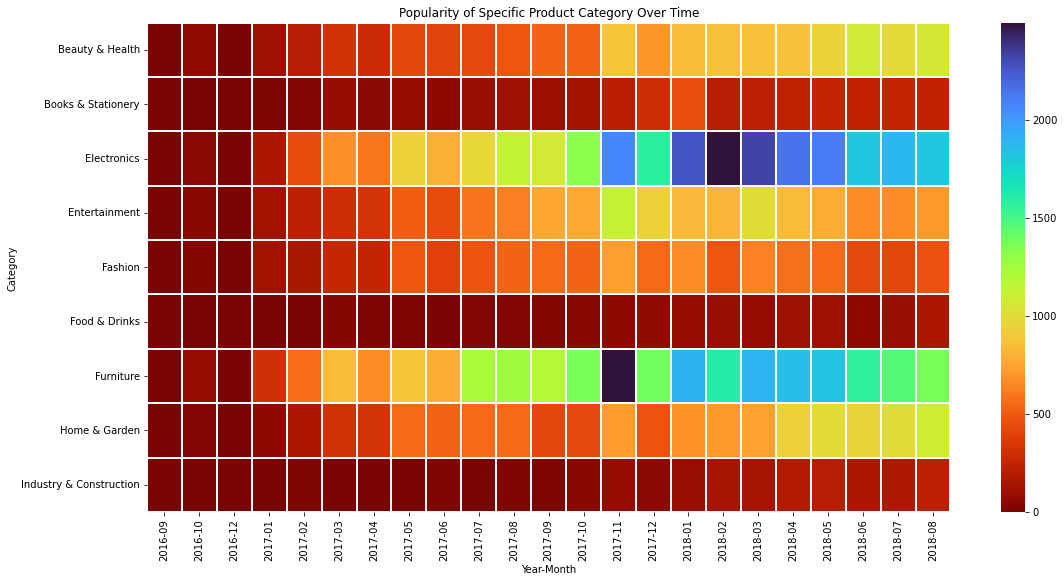

In [14]:
# Replace NaN values with a default value (e.g., 0)
heatmap_data = heatmap_data.fillna(0)

# Set the size of the heatmap
plt.figure(figsize=(18, 9))

# Create the heatmap
sns.heatmap(heatmap_data, cmap='turbo_r', linewidths=1.5)

# Set labels and title
plt.xlabel('Year-Month')
plt.ylabel('Category')
plt.title('Popularity of Specific Product Category Over Time')

# Show the plot
plt.show()